In [118]:
import pandas as pd

df = pd.read_csv('./data/clean.csv')
df = df.dropna()
df.head(5)

,loan_type,property_type,loan_purpose,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,3,1,1,-0.647616,3,18,37,246,2,5,-0.516071,0.289802,44.230,-0.583483,50.933,-0.971095,0.823355,4536,0,1
1,1,1,3,-0.145684,3,369,52,299,1,5,-0.301738,0.132660,15.905,-0.972071,100.000,0.258117,0.239308,2458,0,0
2,2,1,3,-0.215397,3,16,10,306,2,5,-0.236789,0.249876,61.270,-0.102988,100.000,-0.911398,-0.920035,5710,0,1
3,1,1,1,-0.252577,1,305,47,180,2,5,0.010018,0.459766,6.246,0.619338,100.000,0.804886,0.448209,5888,1,1
4,1,1,1,0.444551,3,24,37,20,2,3,-0.210809,0.483575,100.000,-0.415906,82.200,0.043751,-0.046152,289,0,1


In [119]:
# split up the data into labels and features
labels = df['accepted']
features = df.drop(columns=['accepted'])

In [120]:
# setup testing function
test_values = pd.read_csv('./data/test_values.csv')

#def export_submission(df, predictions_arr):
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  459859 non-null float64
population                        477520 non-null float64
minority_population_pct           477518 no

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import datetime

# first pass - standard 50/50 split
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.05,
                                                          random_state=123)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)

# Evaluate accuracy
print('accuracy of model is:',accuracy_score(test_labels, preds))

def export_submission(predictions, df, export_label_column):
    df = pd.DataFrame({export_label_column: predictions})
    df['row_id'] = df.index

    df_export = pd.DataFrame({'row_id':df['row_id'], export_label_column:df[export_label_column]})
    
    currentDT = datetime.datetime.now()
    #export_path = str(currentDT.strftime("%Y-%m-%d %H:%M:%S")) + ".csv"
    #export_path = str(export_path.replace(" ", "_"))
    export_path = "output.csv"
    df_export.to_csv(export_path, index=False)
    print('exporting results to: ', export_path, '# records ', len(df_export))
    
export_submission(preds, df, 'accepted')

accuracy of model is: 0.6110984347191165
exporting results to:  output.csv # records  21913


C:\Users\BenMcC\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy of model2 is: 0.6477433486971205
Features sorted by their score:
[(0.099, 'applicant_income'), (0.0975, 'loan_amount'), (0.0969, 'lender'), (0.0857, 'minority_population_pct'), (0.0822, 'ffiecmedian_family_income'), (0.078, 'population'), (0.0766, 'number_of_1_to_4_family_units'), (0.0759, 'number_of_owner-occupied_units'), (0.0575, 'county_code'), (0.0502, 'msa_md'), (0.0475, 'loan_purpose'), (0.0455, 'state_code'), (0.0377, 'tract_to_msa_md_income_pct'), (0.0145, 'applicant_race'), (0.0139, 'loan_type'), (0.0121, 'preapproval'), (0.0105, 'applicant_ethnicity'), (0.0095, 'co_applicant'), (0.0093, 'property_type')]


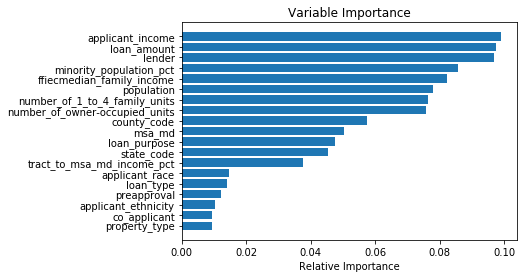

In [122]:
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
import numpy as np

# create a new classifiser
rfc = RandomForestClassifier()
# Train the model
model2 = rfc.fit(train, train_labels)
preds2 = rfc.predict(test)
col_names = df.columns.values

print('accuracy of model2 is:',accuracy_score(test_labels, preds2))

print("Features sorted by their score:")
zipped_objs = zip(map(lambda x: round(x, 4), rfc.feature_importances_), col_names)
print( sorted(zipped_objs, reverse=True) )


# Isolate feature importances 
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(col_names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, col_names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

In [123]:

def unzip(iterable):
    return zip(*iterable)

unzipped = zipped_objs
